# Experiments with Five cities dataset
Code found in src/fivecities/experiment.py, including experiments parameters

In [1]:
# Import packages and classes

import sys 
import os
sys.path.append('..')

from tqdm import tqdm

# Import packages
from src.fivecities.experiment import run_experiment, plot_results_timehorizons, plot_results_PTS
from src.fivecities.reader import FiveCities

# Save images
save = True

# Run experiments with each city and time horizon, with various timesteps

In [2]:

# Decide which time horizons and what the timesteps should be per horizon
seqlength_timestep = {
    5 : [1,2],
    11: [1,6],
    #23: [1,11]
}


# Run experiments for each city with different horizons
results_dict = {}
for city in tqdm(FiveCities.city_list):
    tmp_dict = {}
    for seqlength in seqlength_timestep:
        res = run_experiment(city, seqlength, timestep_list=seqlength_timestep[seqlength])
        tmp_dict[seqlength] = res
    
    results_dict[city] = tmp_dict

100%|███████████████████████████████████████████████████████| 5/5 [04:18<00:00, 51.75s/it]


## Plot for different time horizons 

In [3]:
'''
for city in tqdm(FiveCities.city_list):
    for seqlength in seqlength_timestep:
        plot_results_timehorizons(results_dict[city][seqlength], title=f'{city}_T{seqlength}', save=save)
    '''

"\nfor city in tqdm(FiveCities.city_list):\n    for seqlength in seqlength_timestep:\n        plot_results_timehorizons(results_dict[city][seqlength], title=f'{city}_T{seqlength}', save=save)\n    "

## Plot out the varying privileged time points

100%|███████████████████████████████████████████████████████| 5/5 [00:02<00:00,  2.23it/s]


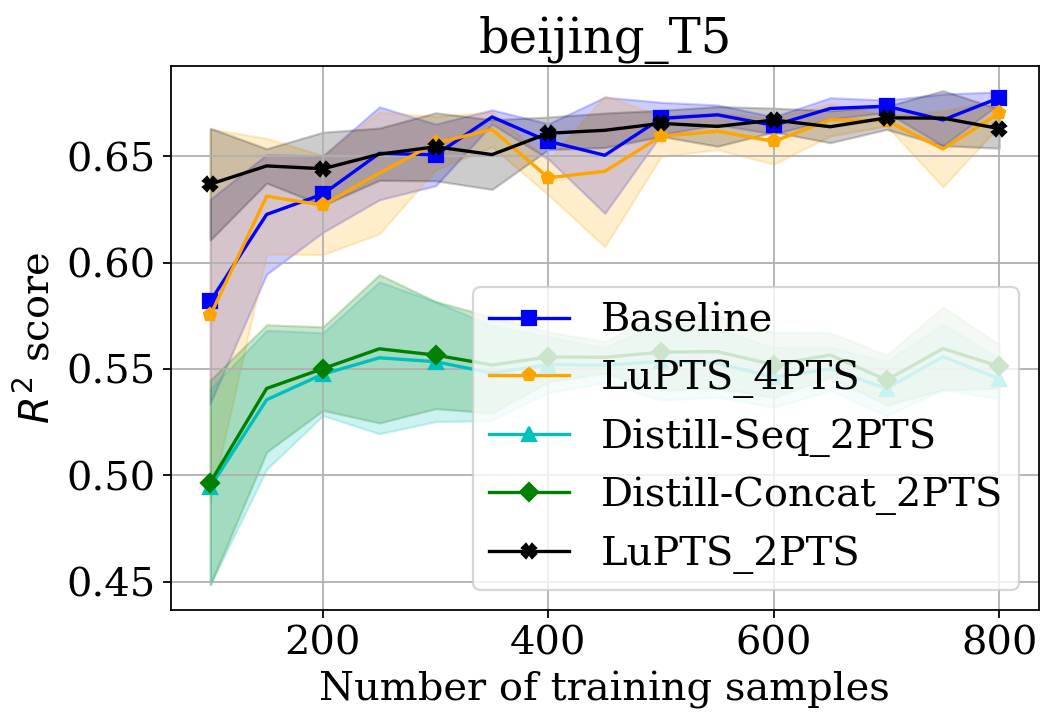

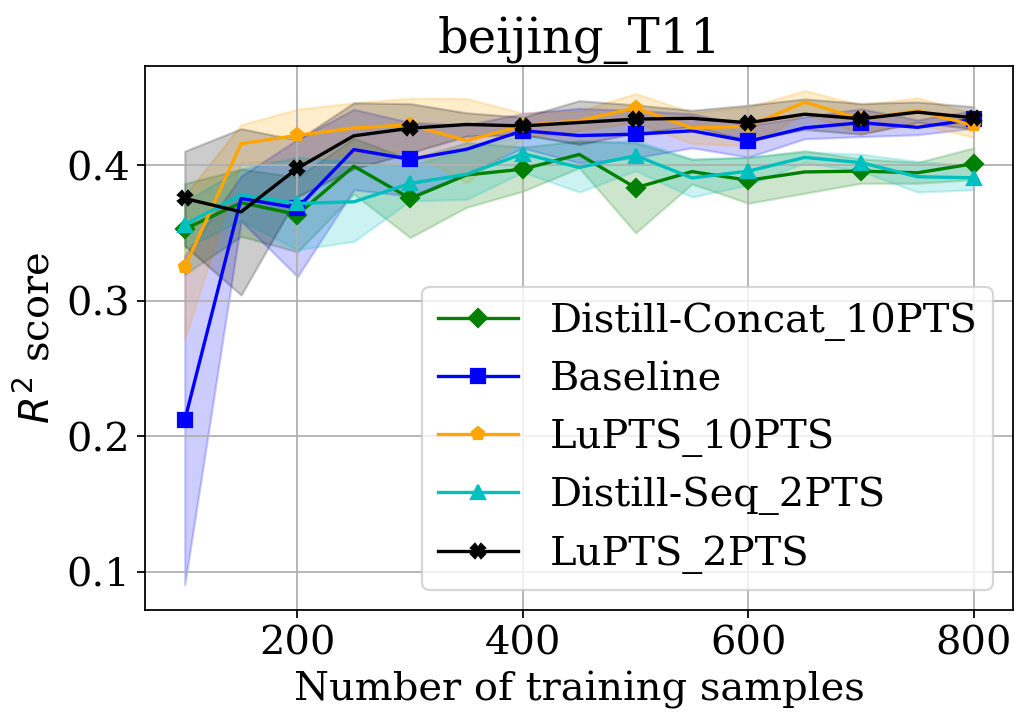

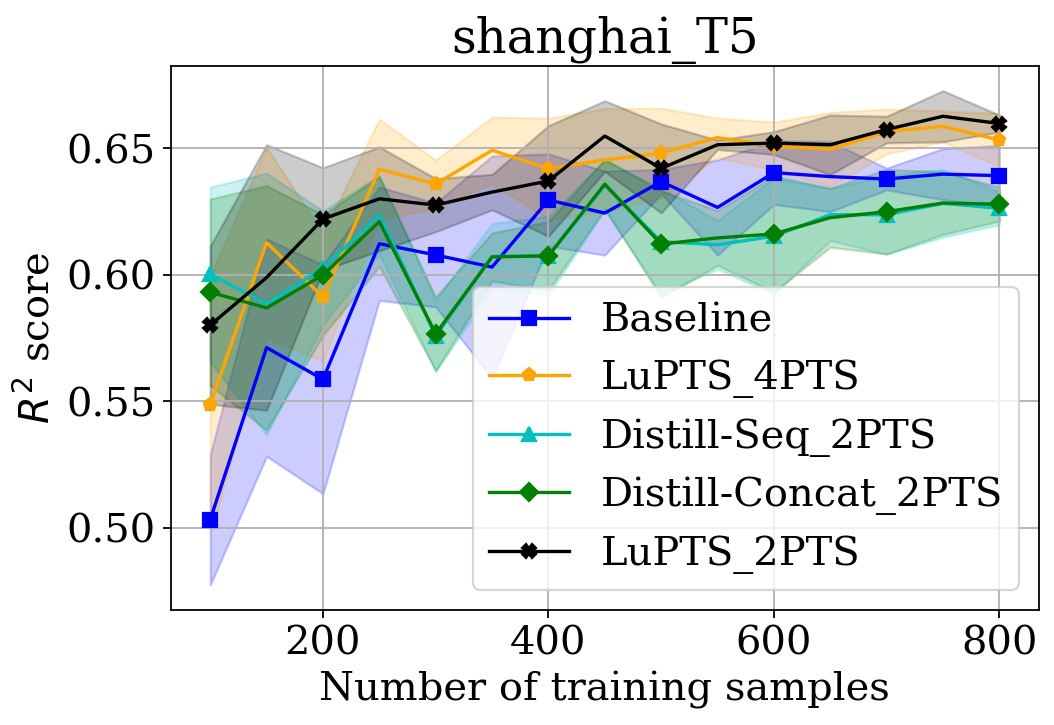

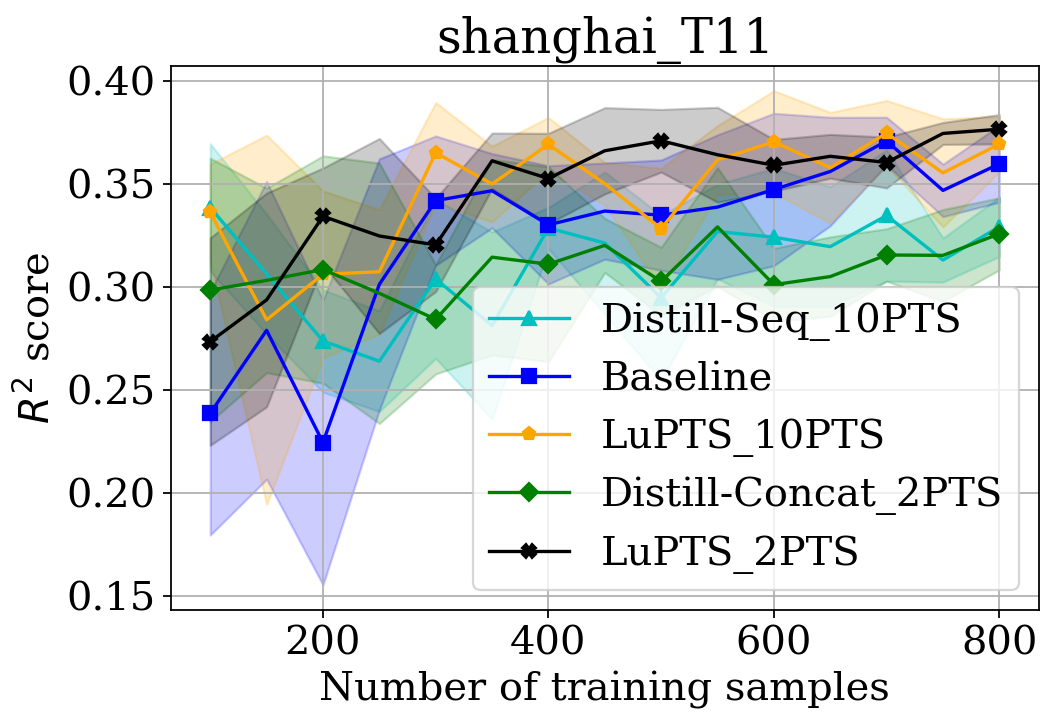

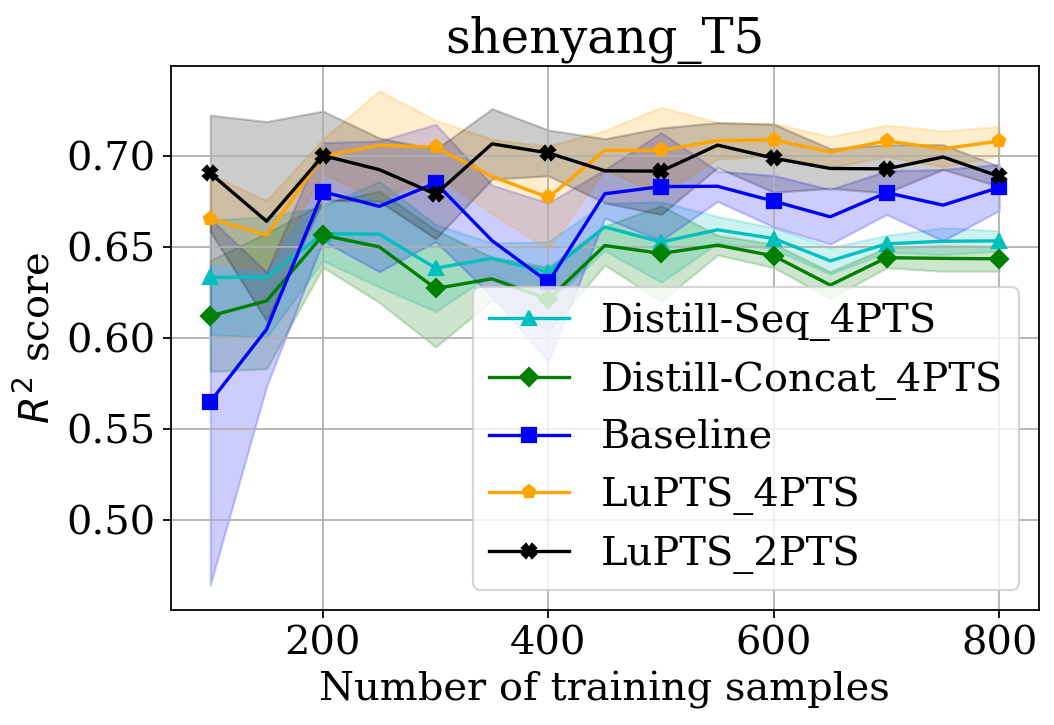

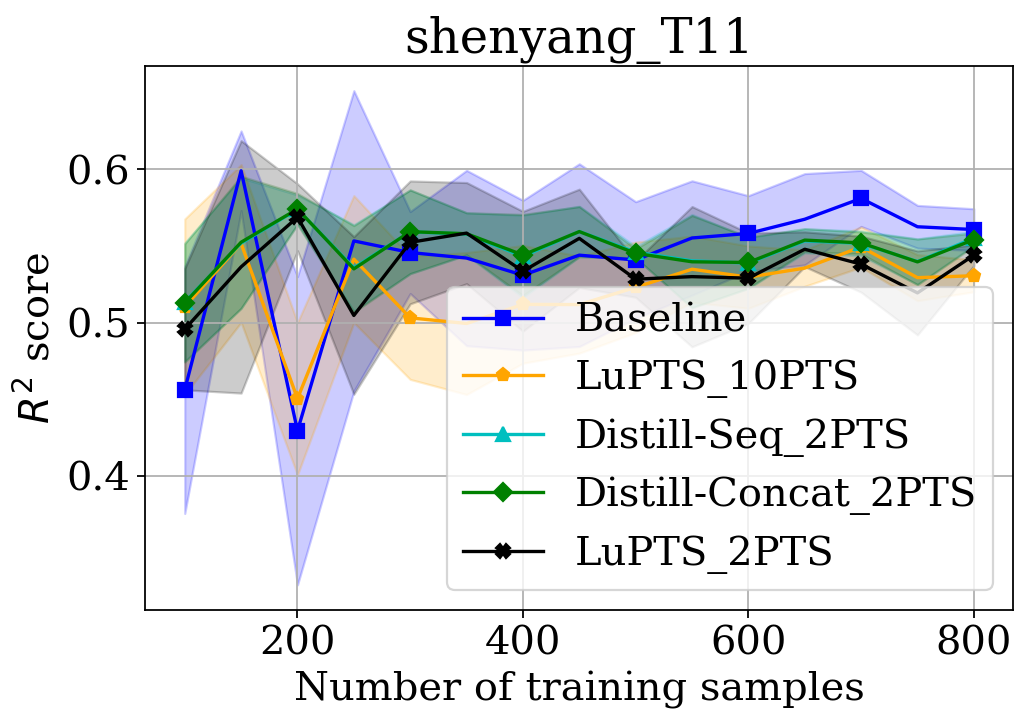

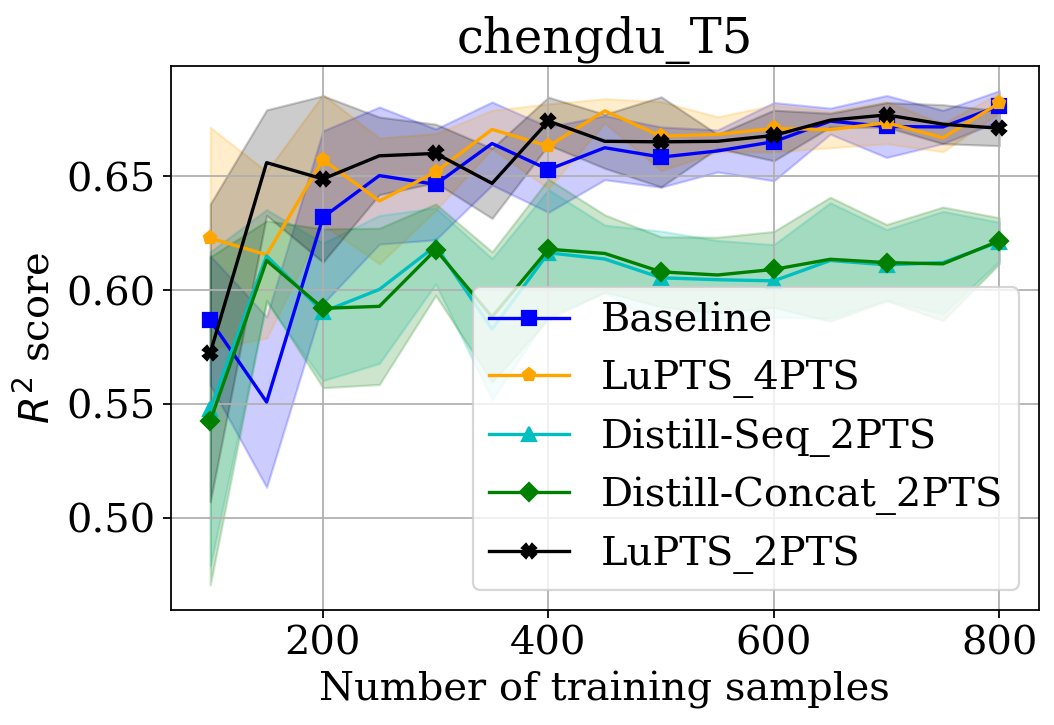

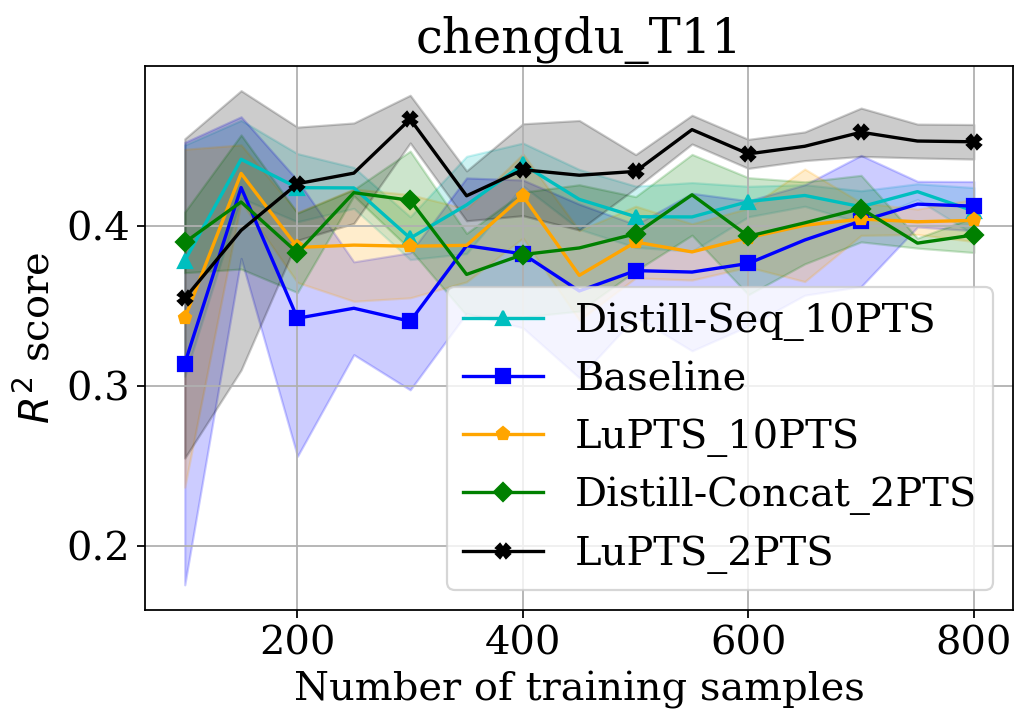

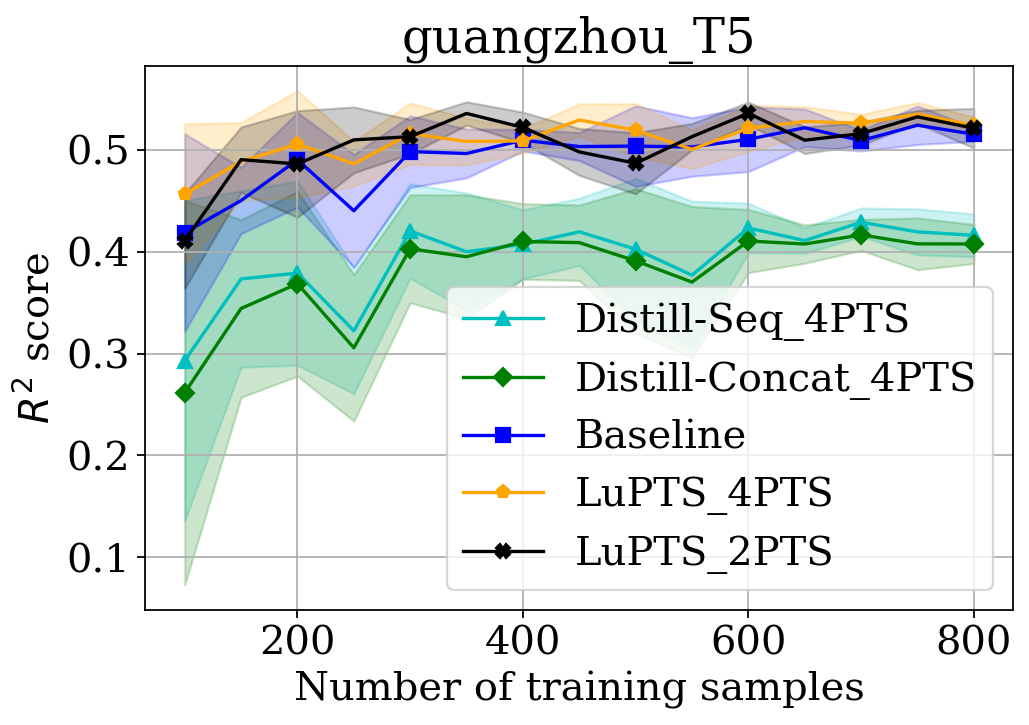

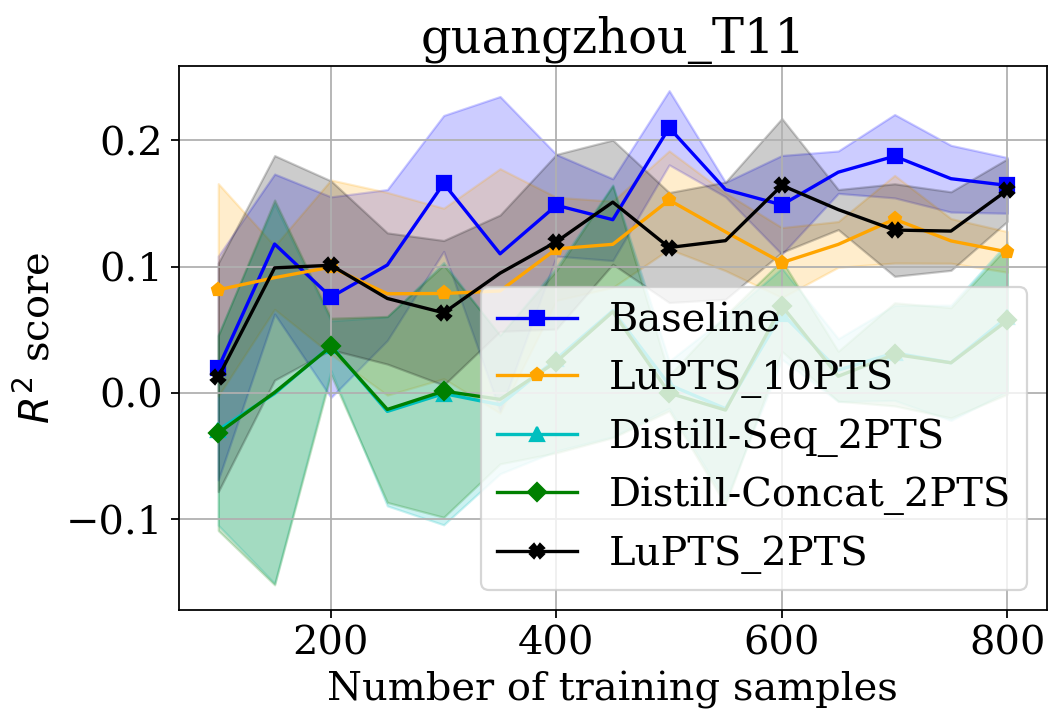

In [4]:
for city in tqdm(FiveCities.city_list):
    for seqlength in seqlength_timestep:
        plot_results_PTS(results_dict[city][seqlength], include_only_model=None, title=f'{city}_T{seqlength}', save=save)

In [5]:
results_dict

{'beijing': {5: {'city': 'beijing',
   'score': <function sklearn.metrics._regression.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')>,
   'sequence_length': 5,
   'timestep': {1: {'Distill-Seq': [(0.5538609477362207, 0.025628579544395232),
      (0.5231670931106741, 0.015248993748951748),
      (0.539088365418668, 0.021482615256557907),
      (0.567490612569372, 0.024034605437986776),
      (0.5327354127181441, 0.0168055550150754),
      (0.5331988267051404, 0.0191035205398941),
      (0.5483114878697071, 0.012522354014749078),
      (0.5486043487815004, 0.026937779104417883),
      (0.5407375672167725, 0.016810088350297903),
      (0.5591638102303257, 0.012667888999535422),
      (0.5487416220213702, 0.010120837206830869),
      (0.5428117576670631, 0.017089690450383558),
      (0.5318115910108876, 0.01894289999345222),
      (0.5466373608594861, 0.005680229240807154),
      (0.5435526317245201, 0.0060413254232321665)],
     'Distill-Concat': [(0.558029